# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [ ]:
# Download datasets from S
#!wget -N https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip -o dogImages.zip
#!wget -N https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
#!unzip -o lfw.zip

--2019-08-12 18:13:25--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.80
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘lfw.zip’

lfw.zip             100%[===================>] 187.62M  69.2MB/s    in 2.7s    

2019-08-12 18:13:28 (69.2 MB/s) - ‘lfw.zip’ saved [196739509/196739509]

Archive:  lfw.zip
   creating: lfw/
  inflating: lfw/.DS_Store           
  inflating: __MACOSX/lfw/._.DS_Store  
   creating: lfw/Aaron_Eckhart/
  inflating: lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
  inflating: __MACOSX/lfw/Aaron_Eckhart/._Aaron_Eckhart_0001.jpg  
  inflating: __MACOSX/lfw/._Aaron_Eckhart  
   creating: lfw/Aaron_Guiel/
  inflating: lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg  
  inflating: __MACOSX/lfw/Aaron_Guiel/._Aaron_Guiel_0001.jpg

In [80]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


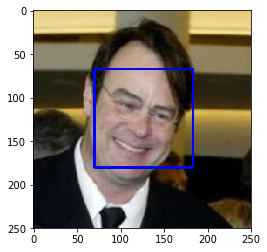

In [140]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [141]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [133]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
count = 0
for image in tqdm(human_files_short):
    result = face_detector(image)
    if result:
        count = count +1
percent = (count/100)
print("Percentage of human face detected = {}%".format(percent))

count = 0
for image in tqdm(dog_files_short):
    result = face_detector(image)
    if result:
        count = count +1
percent = (count/100)
print("Percentage of faces detected in dog files = {}%".format(percent))

  0%|          | 0/100 [00:00<?, ?it/s]

Percentage of human face detected = 0.98%


100%|██████████| 100/100 [00:36<00:00,  2.74it/s]

Percentage of faces detected in dog files = 0.17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [134]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    print("CUDA is available..")
# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

CUDA is available..


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [163]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
  
    ## TODO: Complete the function.
    # Transform image
    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
    ])
    
    
    ## Load and pre-process an image from the given img_path
    img = Image.open(img_path).convert('RGB')
    img_t = transform(img).cuda()
    img_b = torch.unsqueeze(img_t, 0)
    ## Return the *index* of the predicted class for that image
    img_index = VGG16(img_b)
    prediction = img_index.max(1)
    # load color (BGR) image
   
    return prediction[1].item() # predicted class index


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [143]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    if (prediction >= 151 and prediction <= 268):
        result = True
    else:
        result = False
    return result # true/false



### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
Percentage of dogs detected in human files = 0%, 
Percentage of dog face detected in dog files = 1.0%

In [144]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
count = 0
percent = 0

for image in tqdm(human_files_short):
    result = dog_detector(image)
    if result == "True":
        print(count)
        count = count + 1
        
if count > 0:
    percent = (count/100)
else:
    count = 0
    
print("Percentage of dogs detected in human files = {}%".format(percent))

# Check dog_files_short
count = 0
percent = 0

for image in tqdm(dog_files_short):
    result = dog_detector(image)
    if result:
        count = count + 1
        
if count > 0:
    percent = (count/100)
    print(percent)
else:
    count = 0
    
print("Percentage of dog face detected in dog files = {}%".format(percent))

  3%|▎         | 3/100 [00:00<00:03, 29.09it/s]

Percentage of dogs detected in human files = 0%


100%|██████████| 100/100 [00:04<00:00, 23.17it/s]

1.0
Percentage of dog face detected in dog files = 1.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [28]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# define VGG16 model

INCEPTION = models.inception_v3(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    print("CUDA is available..")
# move model to GPU if CUDA is available
if use_cuda:
    INCEPTION = INCEPTION.cuda()

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:03<00:00, 32142721.06it/s]


CUDA is available..


In [29]:
from PIL import Image
import torchvision.transforms as transforms

def INCEPTION_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to INCEPTION model's prediction
    '''
  
    ## TODO: Complete the function.
    # Transform image
    
    transform = transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor()
        ])
    
    
    ## Load and pre-process an image from the given img_path
    img = Image.open(img_path)
    img_t = transform(img).cuda()
    img_b = torch.unsqueeze(img_t, 0)
    
    ## Return the *index* of the predicted class for that image
    INCEPTION.eval()
    img_index = INCEPTION(img_b)
    prediction = img_index.max(1)
    # load color (BGR) image
   
    return prediction[1].item() # predicted class index


In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    prediction = INCEPTION_predict(img_path)
    if (prediction >= 151 and prediction <= 268):
        result = True
    else:
        result = False
    return result # true/false

In [31]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
count = 0
percent = 0

for image in tqdm(human_files_short):
    result = dog_detector(image)
    if result == "True":
        print(count)
        count = count + 1
        
if count > 0:
    percent = (count/100)
else:
    count = 0
    
print("Percentage of dogs detected in human files = {}%".format(percent))

# Check dog_files_short
count = 0
percent = 0

for image in tqdm(dog_files_short):
    result = dog_detector(image)
    if result:
        count = count + 1
        
if count > 0:
    percent = (count/100)
    print(percent)
else:
    count = 0
    
print("Percentage of dog detected in dog files = {}%".format(percent))

  3%|▎         | 3/100 [00:00<00:03, 25.05it/s]

Percentage of dogs detected in human files = 0%


100%|██████████| 100/100 [00:04<00:00, 20.38it/s]

0.99
Percentage of dog detected in dog files = 0.99%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [2]:
# Use ImgAug for more complex image transformation to augment the training set
#!conda install -y imgaug
#!conda install -y numpy=1.17.0
#test = np.divmod(np.array(5), 3)


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [3]:
import os

#import imgaug as ia
#from imgaug import augmenters as iaa
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch as T
import numpy as np
import PIL as PIL


# use this augmentation sequence from https://imgaug.readthedocs.io/en/latest/source/examples_basics.html
# it uses imgaug library and provides more choices than the pytorch transforms
#sometimes = lambda aug: iaa.Sometimes(0.3, aug)
#ia.seed(1)

class ImgAugTransform:
    def __init__(self):
        self.aug = iaa.Sequential(
            [
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    #iaa.Sometimes(0.5,
    #    iaa.GaussianBlur(sigma=(0, 0.5))
    #),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    sometimes(iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )),
     #
        # Execute 0 to 5 of the following (less important) augmenters per
        # image. Don't execute all of them, as that would often be way too
        # strong.
        #
        iaa.SomeOf((0, 3),
            [
                # Blur each image with varying strength using
                # gaussian blur (sigma between 0 and 3.0),
                # average/uniform blur (kernel size between 2x2 and 7x7)
                # median blur (kernel size between 3x3 and 11x11).
                #iaa.OneOf([
                #    iaa.GaussianBlur((0, 3.0)),
                #   iaa.AverageBlur(k=(2, 7)),
                #iaa.MedianBlur(k=(3, 11)),
                #]),

                # Sharpen each image, overlay the result with the original
                # image using an alpha between 0 (no sharpening) and 1
                # (full sharpening effect).
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),

                # Same as sharpen, but for an embossing effect.
                iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)),

                # Search in some images either for all edges or for
                # directed edges. These edges are then marked in a black
                # and white image and overlayed with the original image
                # using an alpha of 0 to 0.7.
                sometimes(iaa.OneOf([
                    iaa.EdgeDetect(alpha=(0, 0.7)),
                    iaa.DirectedEdgeDetect(
                        alpha=(0, 0.7), direction=(0.0, 1.0)
                    ),
                ])),
                 # Add gaussian noise to some images.
                # In 50% of these cases, the noise is randomly sampled per
                # channel and pixel.
                # In the other 50% of all cases it is sampled once per
                # pixel (i.e. brightness change).
                #iaa.AdditiveGaussianNoise(
                #    loc=0, scale=(0.0, 0.05*255), per_channel=0.5
                #),
                # In some images distort local areas with varying strength.
                #sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))),
                
                # Either drop randomly 1 to 10% of all pixels (i.e. set
                # them to black) or drop them on an image with 2-5% percent
                # of the original size, leading to large dropped
                # rectangles.
                #iaa.OneOf([
                #    iaa.Dropout((0.01, 0.1), per_channel=0.5),
                #   iaa.CoarseDropout(
                #        (0.03, 0.15), size_percent=(0.02, 0.05),
                #        per_channel=0.2
                #    ),
                #]),
                # Improve or worsen the contrast of images.
                iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5),

                # Convert each image to grayscale and then overlay the
                # result with the original with random alpha. I.e. remove
                # colors with varying strengths.
                #iaa.Grayscale(alpha=(0.0, 1.0)),
               ],
            
                random_order=True
                  )
        
], #end of Sequence
               
            random_order=True # apply augmenters in random order
        )           
    def __call__(self, img):
        img = np.array(img)
        return self.aug.augment_image(img)
    
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
num_workers = 0
batch_size = 20
# percentage of training set to be used in validation
valid_size = 0.2
# Normalization parameters
param_transform_resize = 224
param_transform_crop = 224
mean=[0.5, 0.5, 0.5]
std=[0.5, 0.5, 0.5]
#mean=[0.485, 0.456, 0.406]
#std=[0.229, 0.224, 0.225]
# Normalize data


train_transforms = transforms.Compose([transforms.Resize(param_transform_resize),
                                       #ImgAugTransform(),    # stop using ImgAugTransform to see if accuracy improve with 
                                       # less transformations
                                       #lambda x: PIL.Image.fromarray(x),
                                       transforms.CenterCrop(param_transform_crop),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.RandomRotation(20),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean,
                                                           std)])

test_transforms = transforms.Compose([transforms.Resize(param_transform_resize),
                                       #ImgAugTransform(),
                                       #lambda x: PIL.Image.fromarray(x),
                                       transforms.CenterCrop(param_transform_crop),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.RandomRotation(20),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean,
                                                           std)])


In [88]:
# Set data loaders
# Training data
train_data = datasets.ImageFolder('data/dogImages/train', transform=train_transforms)

# Test data 
test_data = datasets.ImageFolder('data/dogImages/test', transform=test_transforms)

# Validation data
valid_data = datasets.ImageFolder('data/dogImages/valid', transform=test_transforms)

# prep data loaders

train_loader = T.utils.data.DataLoader(train_data, batch_size=32, shuffle=
                                          True)
valid_loader = T.utils.data.DataLoader(valid_data, batch_size=32)
test_loader = T.utils.data.DataLoader(test_data, batch_size=16)
                  


In [89]:
# get classes for training data
classes = train_data.classes
num_classes = len(classes)

outputsize = len(classes)

print("number of classes in training data: {}".format(num_classes))
print("Classes: \n", classes)

number of classes in training data: 133
Classes: 
 ['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.

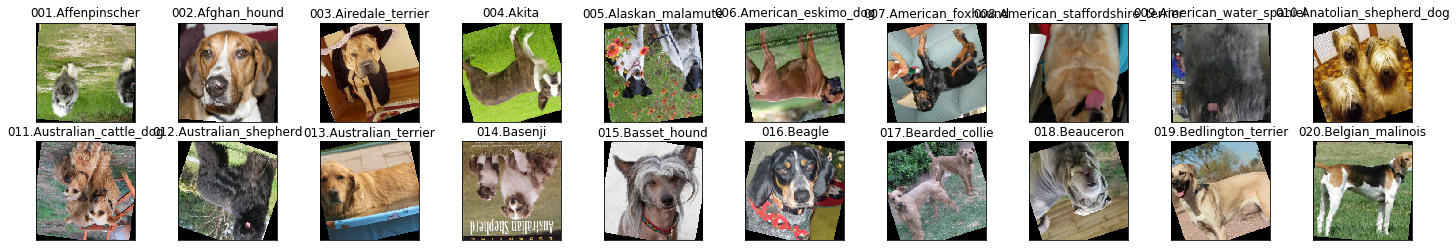

In [90]:
# Visualize training data
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0))) # convert from Tensor image

# Display sample of training images
dataiter = iter(train_loader)
#images, labels = dataiter.next()
images, labels = next(iter(dataiter))
images = images.numpy()

# plot images
fig = plt.figure(figsize=(25, 4))

# Display 10 images
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[idx])
#

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
This is an interesting question given my experience with this project. I started by using the regular torch.vision transform, basically fliping and rotation both horizontally and vertically. But when training I got only up to 9 percent accuracy. I thought that it was mostly likely because I did not have enough images and tried to augment the data through more data transformation. Using ImgAugTransform library I was able to implement many options (see code above). During training I encountered many issues, including: GPU out of memory errors, and very low accuracy (5%). After applying many other techniques such as more dense convolutional architecture, different optimizers, etc. the only thing that works was to go back to the basic transformation with the architecture shown below.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [101]:
import torch.nn as nn
import torch.nn.functional as F

use_cuda = T.cuda.is_available()
param_output_size = 133
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # Convolutional layers (input: 224x224x3)
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 128, 3)
        self.conv5 = nn.Conv2d(128, 256, 3)
        
        self.fc1 = nn.Linear(256 * 6 * 6, 133)
        self.max_pool = nn.MaxPool2d(2, 2,ceil_mode=True)
        
        self.dropout = nn.Dropout(0.20)
        
        self.conv_bn1 = nn.BatchNorm2d(16)
        self.conv_bn2 = nn.BatchNorm2d(32)
        self.conv_bn3 = nn.BatchNorm2d(64)
        self.conv_bn4 = nn.BatchNorm2d(128)
        self.conv_bn5 = nn.BatchNorm2d(256)
        
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = self.conv_bn1(x)

        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = self.conv_bn2(x)

        x = F.relu(self.conv3(x))
        x = self.max_pool(x)
        x = self.conv_bn3(x)

        x = F.relu(self.conv4(x))
        x = self.max_pool(x)
        x = self.conv_bn4(x)

        x = F.relu(self.conv5(x))
        x = self.max_pool(x)
        x = self.conv_bn5(x)

        x = x.view(-1, 256 * 6 * 6)

        x = self.dropout(x)
        x = self.fc1(x)
        return x

    
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [102]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=9216, out_features=133, bias=True)
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (dropout): Dropout(p=0.2)
  (conv_bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
As I said above, this was a rollercoster that took me too long. I started with a basic 3 layers convolution: 
    Conv1    3, 16, 3
    Conv2    16, 32, 3
    Conv2    32, 64, 3
    MaxPool
    Dropout(0.2)
    
    Linear
    
    
 I got to 9 percent with this simple arrangement. Then exploring and trial an error, and research, I ended with an architecture that resembles that of VGG16. This architecture and adabound optimizer got me to 11%. Then reversing back to SGD I was finally able to get 19% accuracy. The experience of trying different approaches was worth the time.
    


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [4]:
# Let's try this new optimizer and see if we can get to 10%. It is at 9% with both Adam and SGD. AdamBound is an integration
# of the best in SGD and Adam. It starts the training using Adam-like algorighm and later switches to SGD using the final_lr
# parameter as the learning rate. See reference below.
# https://openreview.net/forum?id=Bkg3g2R9FX
#@inproceedings{Luo2019AdaBound,
#  author = {Luo, Liangchen and Xiong, Yuanhao and Liu, Yan and Sun, Xu},
#  title = {Adaptive Gradient Methods with Dynamic Bound of Learning Rate},
#  booktitle = {Proceedings of the 7th International Conference on Learning Representations},
#  month = {May},
#  year = {2019},
#  address = {New Orleans, Louisiana}
# }

#!pip install adabound

In [103]:
import torch.optim as optim
import adabound
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()
#criterion_scratch = nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)
#optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.05, momentum=0.9)
#optimizer_scratch = adabound.AdaBound(model_scratch.parameters(), lr=0.01, final_lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # Clear Gradients
            optimizer.zero_grad()
            # Foward pass
            output = model(data)
            # Calculate batch loss
            loss = criterion(output, target)
            # backward pass: 
            loss.backward()
            # optimization step (single)
            optimizer.step()
            # update training loss
            # train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss = train_loss + (1 / (batch_idx + 1)) * (loss.data - train_loss)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(valid_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass
            output = model(data)
            # batch loss
            loss = criterion(output, target)                  
            # Calculate average loss
            valid_loss = valid_loss + (1 / (batch_idx + 1)) * (loss.data - valid_loss)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print("Validation loss decreased ({:6f} --> {:6f}). Saving model...".format(valid_loss_min, valid_loss))
            T.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        else:
            print("Done....")
    # return trained model
    return model


In [21]:
# train the model
model_scratch = train(20, train_loader, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.579090 	Validation Loss: 4.012303
Validation loss decreased (   inf --> 4.012303). Saving model...
Epoch: 2 	Training Loss: 3.450278 	Validation Loss: 4.010874
Validation loss decreased (4.012303 --> 4.010874). Saving model...
Epoch: 3 	Training Loss: 3.332004 	Validation Loss: 3.988975
Validation loss decreased (4.010874 --> 3.988975). Saving model...
Epoch: 4 	Training Loss: 3.206566 	Validation Loss: 4.092826
Done....
Epoch: 5 	Training Loss: 3.085761 	Validation Loss: 3.951453
Validation loss decreased (3.988975 --> 3.951453). Saving model...
Epoch: 6 	Training Loss: 3.004998 	Validation Loss: 3.729693
Validation loss decreased (3.951453 --> 3.729693). Saving model...
Epoch: 7 	Training Loss: 2.887362 	Validation Loss: 3.880186
Done....
Epoch: 8 	Training Loss: 2.806622 	Validation Loss: 4.256032
Done....
Epoch: 9 	Training Loss: 2.694981 	Validation Loss: 4.089025
Done....
Epoch: 10 	Training Loss: 2.613451 	Validation Loss: 3.986684
Done....
Epoch: 11 	

In [22]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(T.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [23]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(test_loader):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(test_loader, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.522122


Test Accuracy: 19% (166/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [91]:
## TODO: Specify data loaders
# Set data loaders
# prep data loaders
train_loader_transfer = train_loader
valid_loader_transfer = valid_loader
test_loader_transfer = test_loader

# Dictionary to facilitate the use of the loaders
loaders_transfer = {}
loaders_transfer = {'train': train_loader_transfer, 'valid': valid_loader_transfer, 'test': test_loader_transfer}



### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [92]:
import torchvision.models as models
import torch.nn as nn
import tqdm
from torch.optim import lr_scheduler
import torch.optim as optim
## TODO: Specify model architecture 
# laod pretrained model from pytorch
#model_transfer = models.resnet50(pretrained=True)
model_transfer = models.vgg16(pretrained=True)
[print(model_transfer)]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

[None]

In [93]:
# Print classifier in/out features
print(model_transfer.classifier[6].in_features)
print(model_transfer.classifier[6].out_features)

4096
1000


In [94]:
# Freeze training for all features
for param in model_transfer.features.parameters():
    param.requires_grad = False

In [95]:
# Final Classifier layer: modify layer (6): Linear(in_features=4096, out_features=1000, bias=True)
n_inputs = model_transfer.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model_transfer.classifier[6] = last_layer

train_on_gpu = T.cuda.is_available()
# Check for CUDA
if train_on_gpu:
    model_transfer.cuda()

print(model_transfer.classifier[6].out_features)

133


In [96]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [97]:
# Print classifier in/out features
# Print classifier in/out features
# Print classifier in/out features
print(model_transfer.classifier[6].in_features)
print(model_transfer.classifier[6].out_features)

4096
133


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.



__Answer:__ 
Based on reading the literature I went with the approch of using VGG16 pre-trained model. VGG16 is widely used for image classification and is known to perform well even with small datasets. I also wanted to try the performance using a different optimizer, adabound with is a combination of SGD and Adam to see if it makes a difference in accuracy and performance.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [144]:
# Let's try this new optimizer and see if we can get to 10%. It is at 9% with both Adam and SGD. AdamBound is an integration
# of the best in SGD and Adam. It starts the training using Adam-like algorighm and later switches to SGD using the final_lr
# parameter as the learning rate. See reference below.
# https://openreview.net/forum?id=Bkg3g2R9FX
#@inproceedings{Luo2019AdaBound,
#  author = {Luo, Liangchen and Xiong, Yuanhao and Liu, Yan and Sun, Xu},
#  title = {Adaptive Gradient Methods with Dynamic Bound of Learning Rate},
#  booktitle = {Proceedings of the 7th International Conference on Learning Representations},
#  month = {May},
#  year = {2019},
#  address = {New Orleans, Louisiana}
# }

#!pip install adabound

In [98]:
from PIL import ImageFile
from torch.optim import lr_scheduler
ImageFile.LOAD_TRUNCATED_IMAGES = True  # Process images even when truncated

#import adabound
criterion_transfer = nn.CrossEntropyLoss()
#optimizer_transfer = optim.SGD(filter(lambda p: p.requires_grad, model_transfer.parameters()), lr=0.001, momentum=0.9)
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)
#optimizer_transfer = adabound.AdaBound(model_transfer.fc.parameters(), lr=1e-3, final_lr=0.001)
#transfer_lr_scheduler = lr_scheduler.StepLR(optimizer_transfer, step_size=2, gamma=0.1)  # remove this and use single step 
# optimization to see if accuracy improved, with it, the loss is starting at about 5.0 and does not decrease appropriately.

# move tensors to GPU if CUDA is available
use_cuda = T.cuda.is_available()
if use_cuda:
    model_transfer.cuda()


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [99]:
# Define the model
#model_transfer = # train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
n_epochs = 20

#def train(model_transfer, criterion_transfer, optimizer_transfer, transfer_lr_scheduler, n_epochs, save_path):
def train(model_transfer, criterion_transfer, optimizer_transfer, n_epochs, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model_transfer.train()
        for batch_idx, (data, target) in enumerate(loaders_transfer['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # Clear Gradients
            optimizer_transfer.zero_grad()
            # Foward pass
            output = model_transfer(data)
            # Calculate batch loss
            loss = criterion_transfer(output, target)
            # backward pass: 
            loss.backward()
            # optimization step (single)
            optimizer_transfer.step()
            # update training loss
            # train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model_transfer.eval()
        for batch_idx, (data, target) in enumerate(loaders_transfer['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass
            output = model_transfer(data)
            # batch loss
            loss = criterion_transfer(output, target)
            # update validation loss
            valid_loss += loss.item() * data.size(0)
            
        # Calculate average loss
        train_loss = train_loss / len(loaders_transfer['train'].dataset)
        valid_loss = valid_loss / len(loaders_transfer['valid'].dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print("Validation loss decreased ({:6f} --> {:6f}). Saving model...".format(valid_loss_min, valid_loss))
            T.save(model_transfer.state_dict(), save_path)
            valid_loss_min = valid_loss
        else:
            print("Done....")
    # return trained model
    return model_transfer


In [17]:
# Train the model
model_transfer = train(model_transfer, criterion_transfer, optimizer_transfer, n_epochs, 'model_transfer.pt')

Epoch: 1 	Training Loss: 4.757186 	Validation Loss: 4.406428
Validation loss decreased (   inf --> 4.406428). Saving model...
Epoch: 2 	Training Loss: 4.195662 	Validation Loss: 3.789553
Validation loss decreased (4.406428 --> 3.789553). Saving model...
Epoch: 3 	Training Loss: 3.551404 	Validation Loss: 3.087723
Validation loss decreased (3.789553 --> 3.087723). Saving model...
Epoch: 4 	Training Loss: 3.006630 	Validation Loss: 2.594239
Validation loss decreased (3.087723 --> 2.594239). Saving model...
Epoch: 5 	Training Loss: 2.600143 	Validation Loss: 2.230907
Validation loss decreased (2.594239 --> 2.230907). Saving model...
Epoch: 6 	Training Loss: 2.344014 	Validation Loss: 1.957145
Validation loss decreased (2.230907 --> 1.957145). Saving model...
Epoch: 7 	Training Loss: 2.138811 	Validation Loss: 1.858602
Validation loss decreased (1.957145 --> 1.858602). Saving model...
Epoch: 8 	Training Loss: 2.048341 	Validation Loss: 1.826616
Validation loss decreased (1.858602 --> 1.826

In [100]:
# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))
model_transfer.load_state_dict(T.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [101]:
# Test model with the test data

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(test_loader):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(test_loader, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.360570


Test Accuracy: 63% (534/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [102]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
train_data = datasets.ImageFolder('data/dogImages/train', transform=train_transforms)
classess = train_data.classes
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in classes]


In [159]:
from PIL import Image
import cv2
import torchvision.transforms as transforms
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.


def predict_breed_transfer(img_path, model):
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    prediction_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
    ])
    
    img_t = prediction_transform(image).cuda()
    img_b = T.unsqueeze(img_t, 0)
    
    ## Return the *index* of the predicted class for that image
    model.eval()
    index = T.argmax(model(img_b))
    
    return index # predicted class index   
 

In [160]:
breed = predict_breed_transfer(dog_files[40], model_transfer)
print("The name of this dog breed is: {}".format(class_names[breed]))

The name of this dog breed is: Mastiff


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [164]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.pyplot as plt

def run_app(img_path, model):
    ## handle cases for a human face, dog, and neither
   ### returns "True" if a dog is detected in the image stored at img_path
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(image)
    plt.show()
    if dog_detector(img_path):            
        predicted_idx = predict_breed_transfer(img_path, model)
        breed = class_names[predicted_idx]
        # Display the image with its breed
        print("Dog Detected...")
        print("The breed name predicted is {}".format(breed))        
    elif face_detector(img_path):
        predicted_index = predict_breed_transfer(img_path, model)
        print("This is a human, if you were a dog, you would be a {}".format(class_names[predicted_index]))
    else:
        print("This is not a human nor a dog")


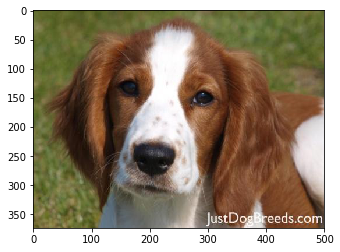

Dog Detected...
The breed name predicted is Irish red and white setter


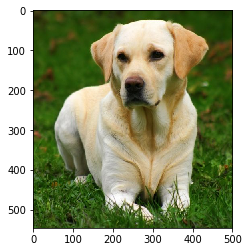

Dog Detected...
The breed name predicted is Labrador retriever


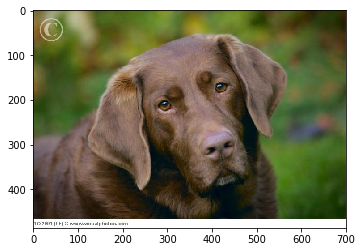

Dog Detected...
The breed name predicted is German shorthaired pointer


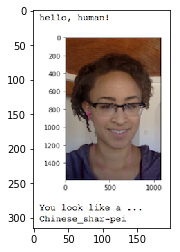

This is a human, if you were a dog, you would be a English cocker spaniel


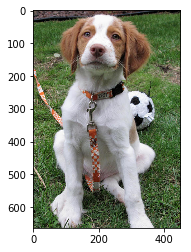

Dog Detected...
The breed name predicted is Brittany


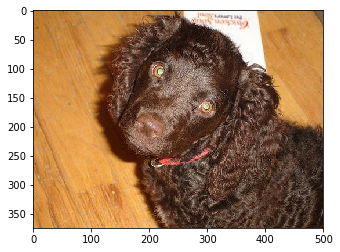

Dog Detected...
The breed name predicted is Boykin spaniel


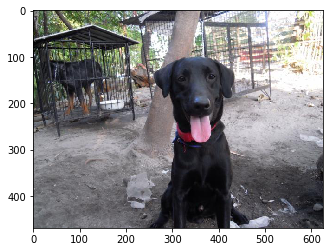

Dog Detected...
The breed name predicted is Black and tan coonhound


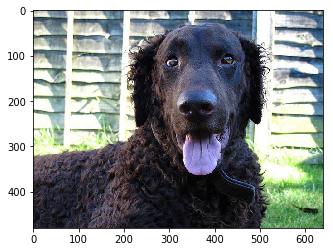

Dog Detected...
The breed name predicted is Curly-coated retriever


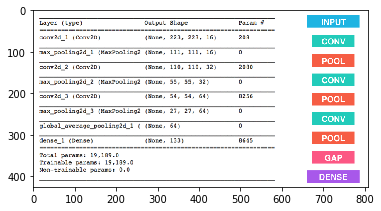

This is not a human nor a dog


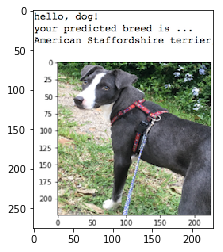

Dog Detected...
The breed name predicted is Greyhound


In [166]:
# Test for all human and dog files
import os
for image in os.listdir('./images'):
    img_path = os.path.join('./images', image)
    run_app(img_path, model_transfer)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.
The output was as expected. Points of improvement includes: Training the model with more images, optimizing hyper-parameters, and trying different CNN configurations. 

__Answer:__ (Three possible points for improvement)

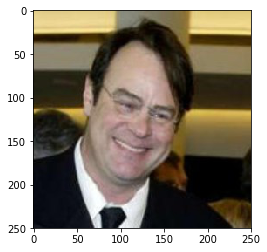

This is a human, if you were a dog, you would be a Dachshund


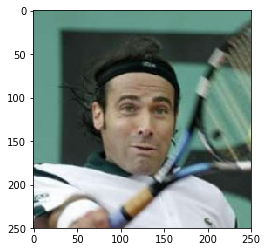

This is a human, if you were a dog, you would be a Bearded collie


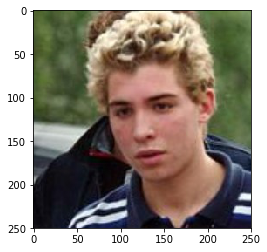

Dog Detected...
The breed name predicted is Irish water spaniel


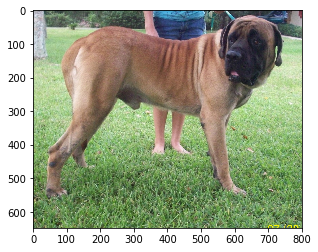

Dog Detected...
The breed name predicted is Bullmastiff


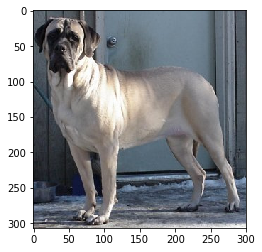

Dog Detected...
The breed name predicted is Mastiff


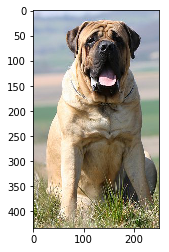

Dog Detected...
The breed name predicted is Bullmastiff


In [167]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file, model_transfer)